In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2023.01.03_No_n0p1p3_final.csv")

#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR&EEG_2022.08.26_final.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [ ]:
dataset.head()

,Subjects,SubjectTypeClass,Data Partition,ExperimentType,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,n1_nogap_peak_ms_20ms,p2_nogap_peak_ms_20ms,n2_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'06_HSO_60_01',Control,Training Data,Test,213,304,425,290,440,81,...,4.670000e-07,0.000055,0.0949,0.0372,0.387,0.481,1.240,6.57,0.245,2.55
1,'06_LSR_34_01',Control,Training Data,Test,219,282,390,282,394,43,...,5.330000e-07,0.000047,0.1210,0.0500,0.419,0.410,0.979,4.83,0.290,2.43
2,'07_KHJ_33_02',Control,Training Data,Test,246,275,456,270,402,72,...,2.890000e-05,0.000778,0.0805,0.0527,0.301,0.566,1.880,6.51,0.268,1.53
3,'08_LJS_26_01',Control,Training Data,Test,212,320,416,297,394,65,...,5.990000e-07,0.000075,0.0885,0.0397,0.354,0.518,1.460,6.80,0.250,2.23
4,'09_JBH_58_01',Control,Training Data,Test,206,271,386,262,402,39,...,8.390000e-07,0.000074,0.1090,0.0564,0.392,0.442,1.130,5.04,0.278,1.93


In [ ]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [ ]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

In [ ]:
X_ = dataset.iloc[:,4:]
y_ = dataset.iloc[:, 1]
col=list(dataset.iloc[0:0,4:])

#Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [ ]:
'''
list_of_feat=[]
norm_start=int(input("Normal Features Start Index:"))
norm_end=int(input("Normal Features End Index:"))
eeg_start=int(input("EEG Features Start Index:"))
eeg_end=int(input("EEG Features End Index:"))



list_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
'''

'\nlist_of_feat=[]\nnorm_start=int(input("Normal Features Start Index:"))\nnorm_end=int(input("Normal Features End Index:"))\neeg_start=int(input("EEG Features Start Index:"))\neeg_end=int(input("EEG Features End Index:"))\n\n\n\nlist_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])\n'

#Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [ ]:
'''list_of_feat=[]
num=int(input("Input number of features: "))

for i in range(num):
  print(i+1,".")
  list_of_feat.append(input("Feature Name: "))'''


'list_of_feat=[]\nnum=int(input("Input number of features: "))\n\nfor i in range(num):\n  print(i+1,".")\n  list_of_feat.append(input("Feature Name: "))'

#Feature Selection (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

**Type-2**

In [ ]:
'''
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectKBest,f_classif\nbestfeatures_2=SelectKBest(f_classif, k=10)\nfit = bestfeatures_f2fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

**Type-3**

In [ ]:
'''
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectFpr, f_classif\n\nbestfeatures_3=SelectFpr(f_classif, alpha=0.1)\nfit = bestfeatures_3.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

<font color='blue' size=6><b>Input</b></font>

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 30


In [ ]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                              Specs      Score
70              gap_AUC_n1p2_R_50ms  28.830587
58             n2_gap_peak_amp_50ms  24.112113
67         p2n2_gap_nogap_diff_50ms  18.730306
27              gap_AUC_n1p2_L_20ms  18.182582
71              gap_AUC_n1p2_L_50ms  17.552783
26              gap_AUC_n1p2_R_20ms  17.456283
14             n2_gap_peak_amp_20ms  15.906518
0               n1_gap_peak_ms_20ms  15.558168
73              gap_AUC_n1p2n2_50ms  14.096806
61           n2_nogap_peak_amp_50ms  13.753050
68       n1p2_gap_no_gap_ratio_50ms  13.733458
132                PeakF_Theta_50ms  13.668109
69       p2n2_gap_no_gap_ratio_50ms  12.830562
29              gap_AUC_n1p2n2_20ms  12.499740
136         SpectralEdge_Delta_50ms  10.916772
140              RelativeAlpha_50ms  10.270649
25       p2n2_gap_no_gap_ratio_20ms   9.939798
74              gap_AUC_p2n2_L_50ms   9.834945
85   nogap_AUC_n1p2n2_by_total_50ms   9.586064
28              gap_AUC_p2n2_R_20ms   9.516311
62           

In [ ]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:1].values[i][0])

#Feature Selection (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [ ]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [ ]:
'''from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'''

'from sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X_, y_)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [ ]:
list_of_feat=["Subjects",
              "p3_gap_peak_amp_20ms",
    "p3_gap_peak_amp_50ms",
    "p1_gap_peak_amp_20ms",
    "p1_gap_peak_amp_50ms",
    "gap_AUC_n1p2_R_20ms",
    "gap_AUC_n1p2_R_50ms",
    "n1p3_interval_nogap_20ms",
    "n1p3_interval_nogap_50ms",
    "n2_gap_peak_amp_20ms",
    "n2_gap_peak_amp_50ms",
    "p2n2_gap_nogap_diff_20ms",
    "p2n2_gap_nogap_diff_50ms",
    "gap_AUC_n1p2_L_20ms",
    "gap_AUC_n1p2_L_50ms",
    "gap_AUC_p1n1_R_20ms",
    "gap_AUC_p1n1_R_50ms",
    "gap_AUC_n1p2n2_20ms",
    "gap_AUC_n1p2n2_50ms",
    "n2_nogap_peak_ms_20ms",
    "n2_nogap_peak_ms_50ms",
    "n1p2_gap_no_gap_ratio_20ms",
    "n1p2_gap_no_gap_ratio_50ms",
    "p2n2_gap_no_gap_ratio_20ms",
    "p2n2_gap_no_gap_ratio_50ms",
    "p1p2_interval_nogap_20ms",
    "p1p2_interval_nogap_50ms",
    "p1n1_nogap_diff_20ms",
    "p1n1_nogap_diff_50ms",
    "n0n2_interval_nogap_20ms",
    "n0n2_interval_nogap_50ms",
    "PeakF_Theta_20ms",
    "PeakF_Theta_50ms",
    "SpectralEdge_Delta_20ms",
    "SpectralEdge_Delta_50ms",
    "RelativeAlpha_20ms",
    "RelativeAlpha_50ms",
    "DTABR_20ms",
    "DTABR_50ms"]

print(len(list_of_feat))

39


In [ ]:
print(list_of_feat1)

['gap_AUC_n1p2_R_50ms', 'n2_gap_peak_amp_50ms', 'p2n2_gap_nogap_diff_50ms', 'gap_AUC_n1p2_L_20ms', 'gap_AUC_n1p2_L_50ms', 'gap_AUC_n1p2_R_20ms', 'n2_gap_peak_amp_20ms', 'n1_gap_peak_ms_20ms', 'gap_AUC_n1p2n2_50ms', 'n2_nogap_peak_amp_50ms', 'n1p2_gap_no_gap_ratio_50ms', 'PeakF_Theta_50ms', 'p2n2_gap_no_gap_ratio_50ms', 'gap_AUC_n1p2n2_20ms', 'SpectralEdge_Delta_50ms', 'RelativeAlpha_50ms', 'p2n2_gap_no_gap_ratio_20ms', 'gap_AUC_p2n2_L_50ms', 'nogap_AUC_n1p2n2_by_total_50ms', 'gap_AUC_p2n2_R_20ms', 'n1p2_gap_diff_50ms', 'DTABR_20ms', 'p2n2_interval_nogap_50ms', 'DTABR_50ms', 'p2n2_interval_nogap_20ms', 'ABR_50ms', 'RelativeAlpha_20ms', 'n1p2_gap_no_gap_ratio_20ms', 'SpectralEdge_Theta_50ms', 'MeanF_Delta_20ms']


In [ ]:
X_new = dataset[list_of_feat1]
y_new = dataset.iloc[:, 1]

In [ ]:
X_new.shape

(165, 30)

In [ ]:
y_new.shape

(165,)

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [ ]:
X_train_with_subject=X_new.iloc[:130,:]
X_test_with_subject=X_new.iloc[130:,:]
y_train=y_new.iloc[:130]
y_test=y_new.iloc[130:]

In [ ]:
X_train_with_subject

,gap_AUC_n1p2_R_50ms,n2_gap_peak_amp_50ms,p2n2_gap_nogap_diff_50ms,gap_AUC_n1p2_L_20ms,gap_AUC_n1p2_L_50ms,gap_AUC_n1p2_R_20ms,n2_gap_peak_amp_20ms,n1_gap_peak_ms_20ms,gap_AUC_n1p2n2_50ms,n2_nogap_peak_amp_50ms,...,n1p2_gap_diff_50ms,DTABR_20ms,p2n2_interval_nogap_50ms,DTABR_50ms,p2n2_interval_nogap_20ms,ABR_50ms,RelativeAlpha_20ms,n1p2_gap_no_gap_ratio_20ms,SpectralEdge_Theta_50ms,MeanF_Delta_20ms
0,0.229010,11.290563,-401.133641,0.555686,0.488267,0.108394,11.544318,213,1921.409503,271.710623,...,-377.781706,6.64,-6.227688,6.57,-3.537207,2.550,0.0887,-601.061131,7.003894,6.614790
1,0.185048,9.810419,-271.741833,0.532327,0.504861,0.147754,17.548932,219,1689.147966,64.912375,...,-200.324263,7.06,-6.377089,4.83,-6.439943,2.430,0.0864,-737.699525,6.225682,7.003892
2,0.073321,8.102809,-350.400304,0.541695,0.604179,0.264380,6.958529,246,1252.136301,9.853043,...,-170.156723,6.57,-2.723576,6.51,-0.908919,1.530,0.0783,-286.287981,7.782104,8.949416
3,0.226157,6.113812,-114.346452,0.590480,0.509911,0.183007,2.438374,212,928.862001,77.012969,...,-224.497406,5.16,-4.653262,6.80,-3.533400,2.230,0.1110,-72.540051,5.836578,7.003892
4,0.118154,8.770084,-173.354311,0.647517,0.547115,0.123296,11.947191,206,933.676848,39.962964,...,-400.851692,4.35,-4.142614,5.04,-4.861031,1.930,0.1230,-432.078750,7.003894,7.782102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.390063,2.442276,-98.850390,0.191658,0.308863,0.433053,2.365112,215,841.107650,254.381061,...,-78.603127,4.87,-3.808967,4.50,-3.481456,1.890,0.1100,-282.665345,7.392998,7.782100
126,0.145446,6.472717,-259.180264,0.586236,0.671793,0.093025,7.650185,205,840.383988,78.632554,...,-107.204069,1.41,-2.765991,3.17,-3.162181,0.983,0.1930,-298.115480,7.392998,9.727628
127,0.176876,8.736898,-312.522383,0.537328,0.487993,0.170094,4.627091,219,1568.051721,131.315166,...,-334.723802,2.43,-4.239917,1.35,-2.890800,0.838,0.1610,-223.881302,9.727628,9.338520
128,0.450968,2.252808,-35.746760,0.385033,0.199415,0.263754,4.150460,230,1132.548530,265.266247,...,-121.596051,4.91,-3.918723,5.69,-4.095293,1.550,0.0833,-396.562554,8.171208,7.782104


In [ ]:
X_test_with_subject

,gap_AUC_n1p2_R_50ms,n2_gap_peak_amp_50ms,p2n2_gap_nogap_diff_50ms,gap_AUC_n1p2_L_20ms,gap_AUC_n1p2_L_50ms,gap_AUC_n1p2_R_20ms,n2_gap_peak_amp_20ms,n1_gap_peak_ms_20ms,gap_AUC_n1p2n2_50ms,n2_nogap_peak_amp_50ms,...,n1p2_gap_diff_50ms,DTABR_20ms,p2n2_interval_nogap_50ms,DTABR_50ms,p2n2_interval_nogap_20ms,ABR_50ms,RelativeAlpha_20ms,n1p2_gap_no_gap_ratio_20ms,SpectralEdge_Theta_50ms,MeanF_Delta_20ms
130,0.185524,13.893770,-402.280624,0.612652,0.616804,0.156466,16.627564,228,2632.523418,275.596285,...,-334.892870,1.780,-1.283239,3.54,-5.062153,1.320,0.1630,-1098.011123,7.392998,9.338524
131,0.203302,5.997927,-125.527634,0.573169,0.485423,0.261182,5.748938,224,913.557237,32.362776,...,-63.479099,5.800,-2.430461,5.59,-2.315242,2.450,0.0929,-332.374756,5.836578,7.003894
132,0.057549,6.678881,-285.425973,0.603509,0.571366,0.212948,6.230205,228,1298.456263,0.000000,...,-361.191553,1.640,-5.541473,2.33,-3.786523,1.550,0.2090,-376.361787,7.003890,9.727626
133,0.164803,6.752451,-330.371161,0.691182,0.519429,0.095705,5.891155,185,1153.860634,31.222057,...,-180.315792,2.950,-1.921418,2.72,-2.851264,1.520,0.1450,-399.742693,7.003892,8.171206
134,0.143402,5.167191,-134.526017,0.562882,0.569989,0.192883,7.664998,221,1077.879789,11.080097,...,-135.042126,2.990,-3.500242,6.92,-2.937966,2.500,0.1620,-444.146551,5.836578,8.560312
135,0.086081,7.899926,-224.059124,0.540300,0.730304,0.145947,8.663695,220,1425.706715,60.312252,...,-133.844772,12.300,-1.633198,9.90,-3.890396,2.420,0.0574,-365.077595,5.836580,5.836580
136,0.168904,8.969406,-300.164130,0.428022,0.645583,0.183873,8.196712,239,1705.621110,103.332328,...,-143.353681,7.210,-6.692111,5.74,-3.201439,2.380,0.0912,-506.274018,6.225684,6.614790
137,0.332026,6.585555,-227.529646,0.464277,0.400064,0.354912,6.029067,228,1290.707433,207.448482,...,-93.139021,1.070,0.392135,1.64,-4.769956,1.020,0.2340,-339.757688,10.505838,14.396888
138,0.459577,11.790480,-167.618610,0.425079,0.306174,0.231921,13.825711,222,1676.757521,794.070164,...,-335.868459,1.280,-7.150341,1.97,-7.539699,1.210,0.2330,-456.863278,8.949418,11.284046
139,0.052612,8.261368,-416.660906,0.551956,0.695789,0.148568,8.399544,206,1425.534387,32.472237,...,-194.012766,2.320,-1.536414,2.61,-4.534964,1.830,0.1910,-345.009422,8.560310,10.505836


In [ ]:
X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

In [ ]:
result={}



---





---



#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[14  5]
 [10  6]]
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.55      0.38      0.44        16

    accuracy                           0.57        35
   macro avg       0.56      0.56      0.55        35
weighted avg       0.57      0.57      0.56        35

Accurecy:  0.5714285714285714


1/200 round completed......................... Accurecy: 0.4857142857142857
2/200 round completed......................... Accurecy: 0.5142857142857142
3/200 round completed......................... Accurecy: 0.5142857142857142
4/200 round completed......................... Accurecy: 0.6571428571428571
5/200 round completed......................... Accurecy: 0.6571428571428571
6/200 round completed......................... Accurecy: 0.6285714285714286
7/200 round completed......................... Accurecy: 0.5428571428571428
8/200 round completed......................... Accurecy: 0.5714285714285714
9/200 round completed......................... Accurecy: 0.5714285714285714
10/200 round completed......................... Accurecy: 0.5714285714285714
11/200 round completed......................... Accurecy: 0.5714285714285714
12/200 round completed......................... Accurecy: 0.5714285714285714
13/200 round completed......................... Accurecy: 0.5714285714285714
14/200 r

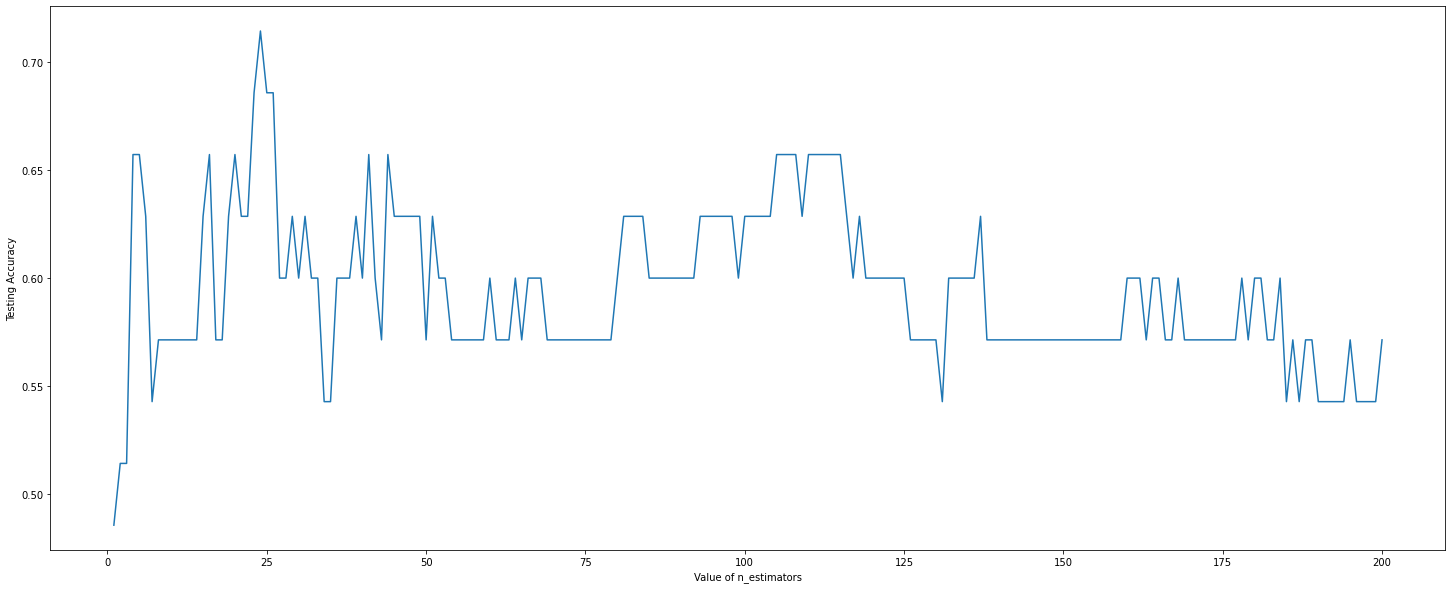

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[17  2]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.68      0.89      0.77        19
           1       0.80      0.50      0.62        16

    accuracy                           0.71        35
   macro avg       0.74      0.70      0.69        35
weighted avg       0.73      0.71      0.70        35

Accurecy:  0.7142857142857143




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[14  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.58      0.44      0.50        16

    accuracy                           0.60        35
   macro avg       0.60      0.59      0.58        35
weighted avg       0.60      0.60      0.59        35

Accurecy:  0.6


1/150 round completed......................... Accurecy: 0.4857142857142857
2/150 round completed......................... Accurecy: 0.5142857142857142
3/150 round completed......................... Accurecy: 0.5142857142857142
4/150 round completed......................... Accurecy: 0.6
5/150 round completed......................... Accurecy: 0.6
6/150 round completed......................... Accurecy: 0.6285714285714286
7/150 round completed......................... Accurecy: 0.6
8/150 round completed......................... Accurecy: 0.5714285714285714
9/150 round completed......................... Accurecy: 0.5714285714285714
10/150 round completed......................... Accurecy: 0.5714285714285714
11/150 round completed......................... Accurecy: 0.5714285714285714
12/150 round completed......................... Accurecy: 0.5428571428571428
13/150 round completed......................... Accurecy: 0.5714285714285714
14/150 round completed......................... Accur

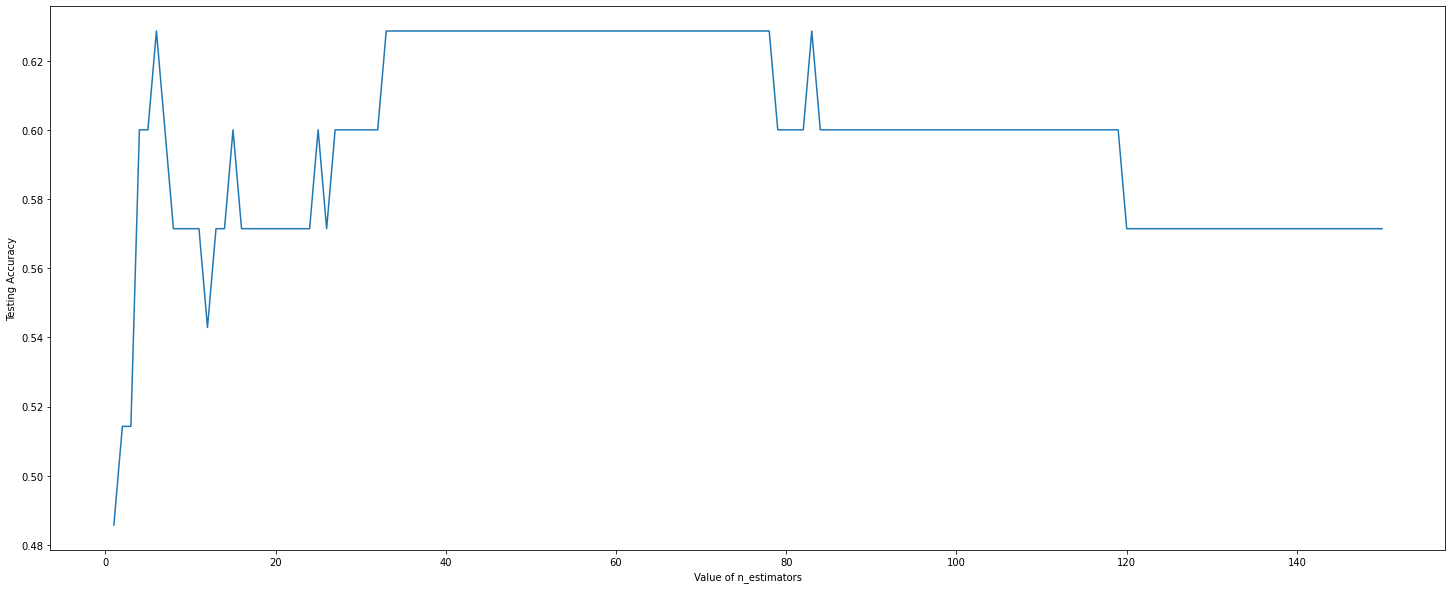

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.6857142857142857
2/30 round completed......................... Accurecy: 0.6
3/30 round completed......................... Accurecy: 0.6
4/30 round completed......................... Accurecy: 0.6
5/30 round completed......................... Accurecy: 0.6285714285714286
6/30 round completed......................... Accurecy: 0.6285714285714286
7/30 round completed......................... Accurecy: 0.6571428571428571
8/30 round completed......................... Accurecy: 0.5428571428571428
9/30 round completed......................... Accurecy: 0.6
10/30 round completed......................... Accurecy: 0.6285714285714286
11/30 round completed......................... Accurecy: 0.6285714285714286
12/30 round completed......................... Accurecy: 0.6285714285714286
13/30 round completed......................... Accurecy: 0.6285714285714286
14/30 round completed......................... Accurecy: 0.6285714285714286
15/30

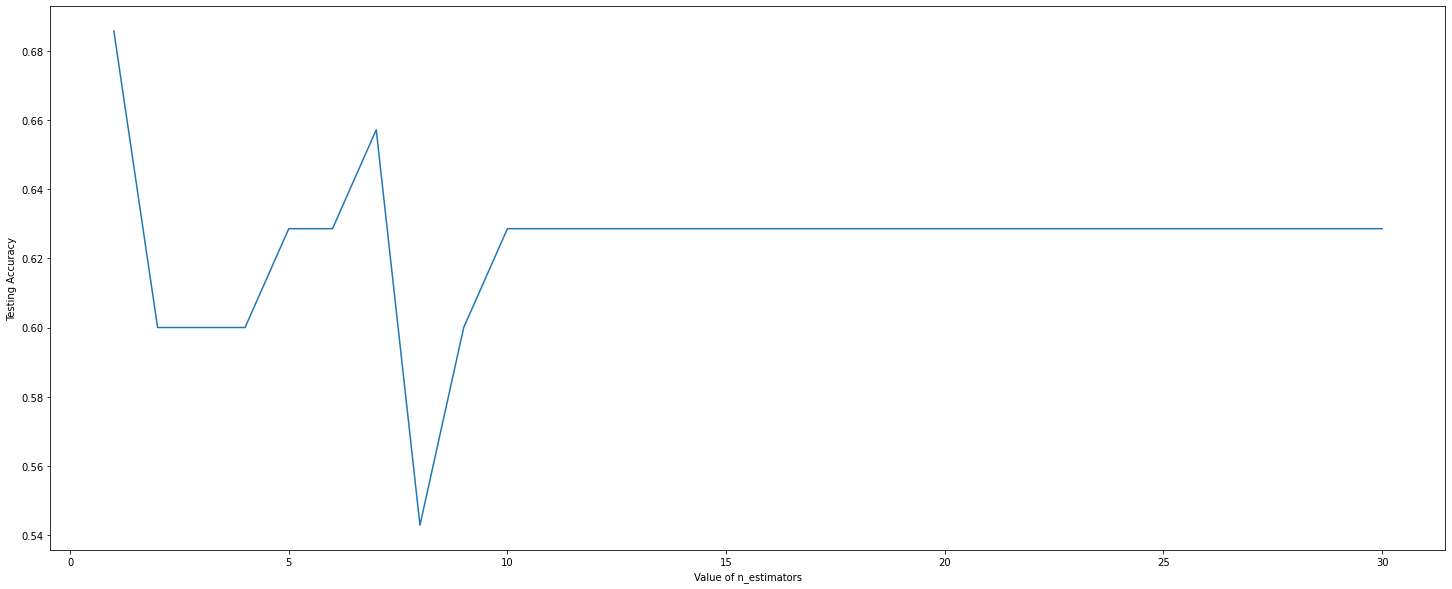

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.64      0.44      0.52        16

    accuracy                           0.63        35
   macro avg       0.63      0.61      0.61        35
weighted avg       0.63      0.63      0.62        35

Accurecy:  0.6285714285714286


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.69      0.56      0.62        16

    accuracy                           0.69        35
   macro avg       0.69      0.68      0.68        35
weighted avg       0.69      0.69      0.68        35

Accurecy:  0.6857142857142857


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [12  4]]
              precision    recall  f1-score   support

           0       0.56      0.79      0.65        19
           1       0.50      0.25      0.33        16

    accuracy                           0.54        35
   macro avg       0.53      0.52      0.49        35
weighted avg       0.53      0.54      0.51        35

Accurecy:  0.5428571428571428




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.62      0.62      0.62        16

    accuracy                           0.66        35
   macro avg       0.65      0.65      0.65        35
weighted avg       0.66      0.66      0.66        35

Accurecy:  0.6571428571428571


1/150 round completed......................... Accurecy: 0.5428571428571428
2/150 round completed......................... Accurecy: 0.5428571428571428
3/150 round completed......................... Accurecy: 0.6285714285714286
4/150 round completed......................... Accurecy: 0.5714285714285714
5/150 round completed......................... Accurecy: 0.6
6/150 round completed......................... Accurecy: 0.6
7/150 round completed......................... Accurecy: 0.7142857142857143
8/150 round completed......................... Accurecy: 0.7142857142857143
9/150 round completed......................... Accurecy: 0.6857142857142857
10/150 round completed......................... Accurecy: 0.7142857142857143
11/150 round completed......................... Accurecy: 0.7142857142857143
12/150 round completed......................... Accurecy: 0.7714285714285715
13/150 round completed......................... Accurecy: 0.7714285714285715
14/150 round completed................

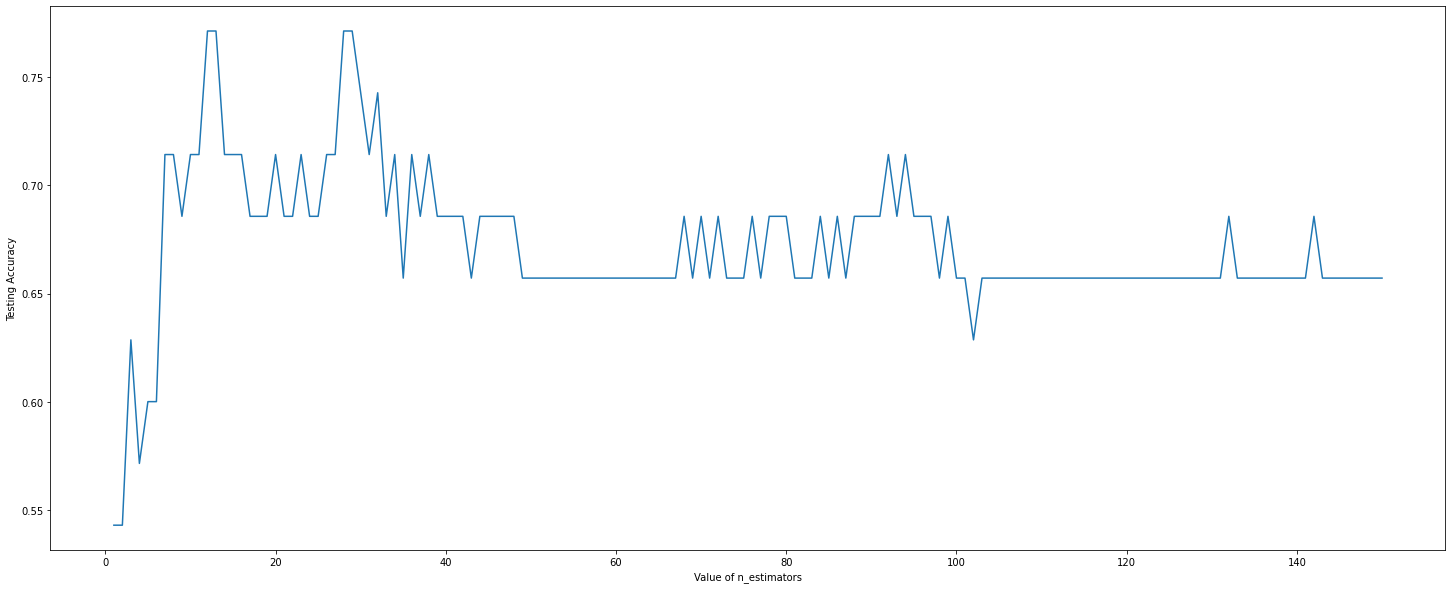

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.6571428571428571
2/150 round completed......................... Accurecy: 0.6285714285714286
3/150 round completed......................... Accurecy: 0.6571428571428571
4/150 round completed......................... Accurecy: 0.6
5/150 round completed......................... Accurecy: 0.6857142857142857
6/150 round completed......................... Accurecy: 0.6285714285714286
7/150 round completed......................... Accurecy: 0.6571428571428571
8/150 round completed......................... Accurecy: 0.6285714285714286
9/150 round completed......................... Accurecy: 0.6285714285714286
10/150 round completed......................... Accurecy: 0.6285714285714286
11/150 round completed......................... Accurecy: 0.6571428571428571
12/150 round completed......................... Accurecy: 0.6571428571428571
13/150 round completed......................... Accurecy: 0.6571428571428571
14/150 round completed.

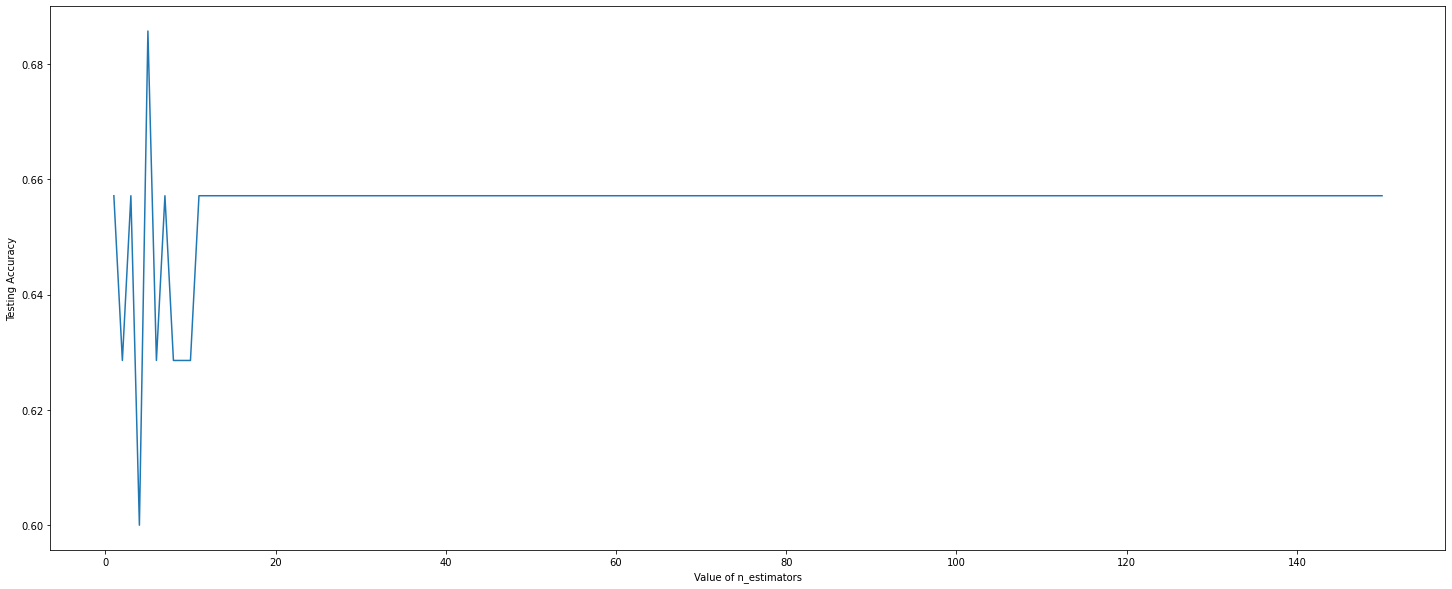

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.75      0.75      0.75        16

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.77      0.77      0.77        35

Accurecy:  0.7714285714285715


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  5]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.67      0.62      0.65        16

    accuracy                           0.69        35
   macro avg       0.68      0.68      0.68        35
weighted avg       0.68      0.69      0.68        35

Accurecy:  0.6857142857142857


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.71      0.62      0.67        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35

Accurecy:  0.7142857142857143




---



---



#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[14  5]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.64      0.56      0.60        16

    accuracy                           0.66        35
   macro avg       0.65      0.65      0.65        35
weighted avg       0.66      0.66      0.65        35

Accurecy:  0.6571428571428571


1/250 round completed......................... Accurecy: 0.6
2/250 round completed......................... Accurecy: 0.7428571428571429
3/250 round completed......................... Accurecy: 0.6857142857142857
4/250 round completed......................... Accurecy: 0.6857142857142857
5/250 round completed......................... Accurecy: 0.6285714285714286
6/250 round completed......................... Accurecy: 0.6857142857142857
7/250 round completed......................... Accurecy: 0.6571428571428571
8/250 round completed......................... Accurecy: 0.6571428571428571
9/250 round completed......................... Accurecy: 0.6571428571428571
10/250 round completed......................... Accurecy: 0.6285714285714286
11/250 round completed......................... Accurecy: 0.6285714285714286
12/250 round completed......................... Accurecy: 0.6285714285714286
13/250 round completed......................... Accurecy: 0.6571428571428571
14/250 round completed.

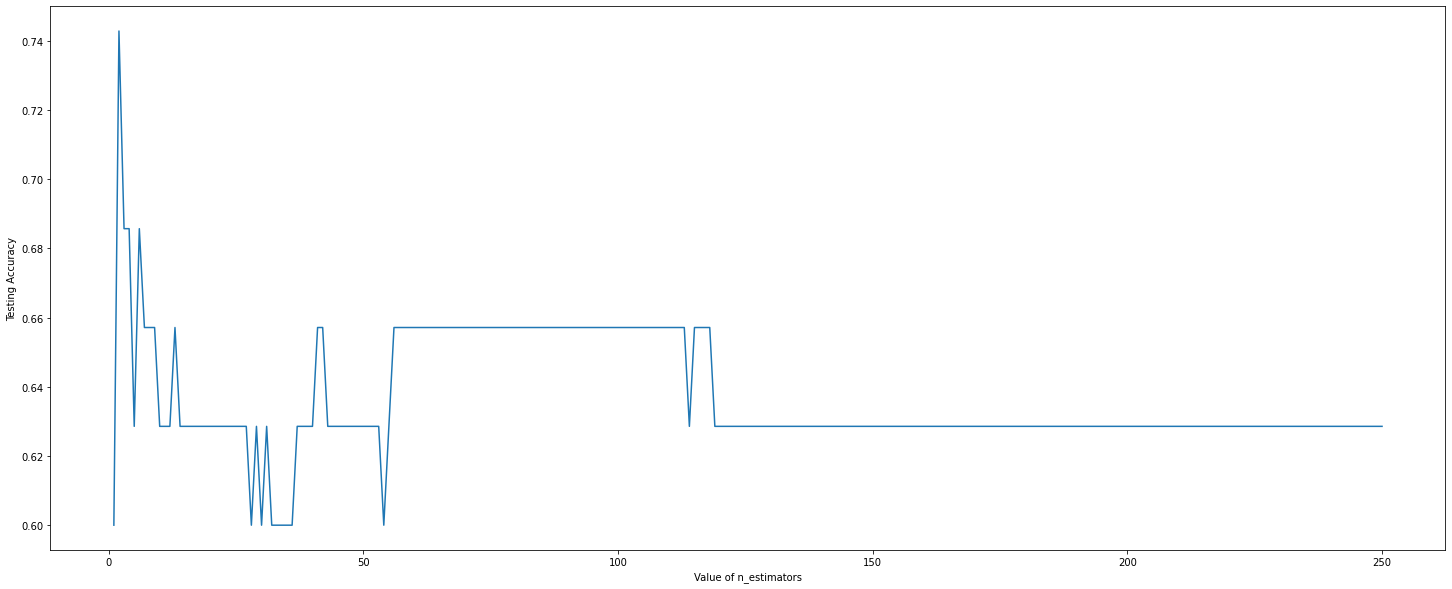

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7142857142857143
2/250 round completed......................... Accurecy: 0.6
3/250 round completed......................... Accurecy: 0.6571428571428571
4/250 round completed......................... Accurecy: 0.6571428571428571
5/250 round completed......................... Accurecy: 0.6571428571428571
6/250 round completed......................... Accurecy: 0.6571428571428571
7/250 round completed......................... Accurecy: 0.6571428571428571
8/250 round completed......................... Accurecy: 0.6571428571428571
9/250 round completed......................... Accurecy: 0.6571428571428571
10/250 round completed......................... Accurecy: 0.6571428571428571
11/250 round completed......................... Accurecy: 0.6571428571428571
12/250 round completed......................... Accurecy: 0.6571428571428571
13/250 round completed......................... Accurecy: 0.6571428571428571
14/250 round completed.

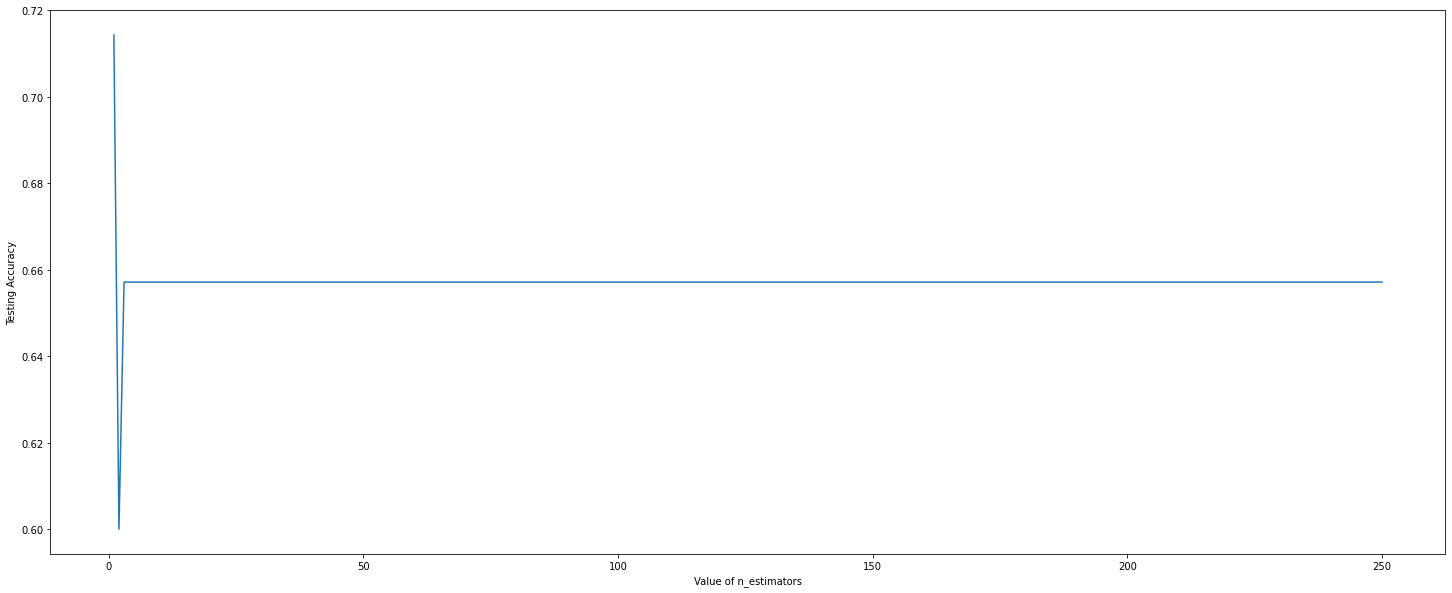

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[16  3]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.75      0.56      0.64        16

    accuracy                           0.71        35
   macro avg       0.72      0.70      0.70        35
weighted avg       0.72      0.71      0.71        35

Accurecy:  0.7142857142857143
XGBClassifier(max_depth=1)


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[16  3]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.77      0.62      0.69        16

    accuracy                           0.74        35
   macro avg       0.75      0.73      0.74        35
weighted avg       0.75      0.74      0.74        35

Accurecy:  0.7428571428571429
XGBClassifier(n_estimators=2)


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[16  3]
 [15  1]]
              precision    recall  f1-score   support

           0       0.52      0.84      0.64        19
           1       0.25      0.06      0.10        16

    accuracy                           0.49        35
   macro avg       0.38      0.45      0.37        35
weighted avg       0.39      0.49      0.39        35

Accurecy:  0.4857142857142857


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.50      0.44      0.47        16

    accuracy                           0.54        35
   macro avg       0.54      0.53      0.53        35
weighted avg       0.54      0.54      0.54        35

Accurecy:  0.5428571428571428


1/105 round completed......................... Accurecy: 0.5714285714285714
2/105 round completed......................... Accurecy: 0.5714285714285714
3/105 round completed......................... Accurecy: 0.6857142857142857
4/105 round completed......................... Accurecy: 0.5714285714285714
5/105 round completed......................... Accurecy: 0.5428571428571428
6/105 round completed......................... Accurecy: 0.5428571428571428
7/105 round completed......................... Accurecy: 0.5714285714285714
8/105 round completed......................... Accurecy: 0.5428571428571428
9/105 round completed......................... Accurecy: 0.5142857142857142
10/105 round completed......................... Accurecy: 0.5142857142857142
11/105 round completed......................... Accurecy: 0.5428571428571428
12/105 round completed......................... Accurecy: 0.4857142857142857
13/105 round completed......................... Accurecy: 0.5142857142857142
14/105 r

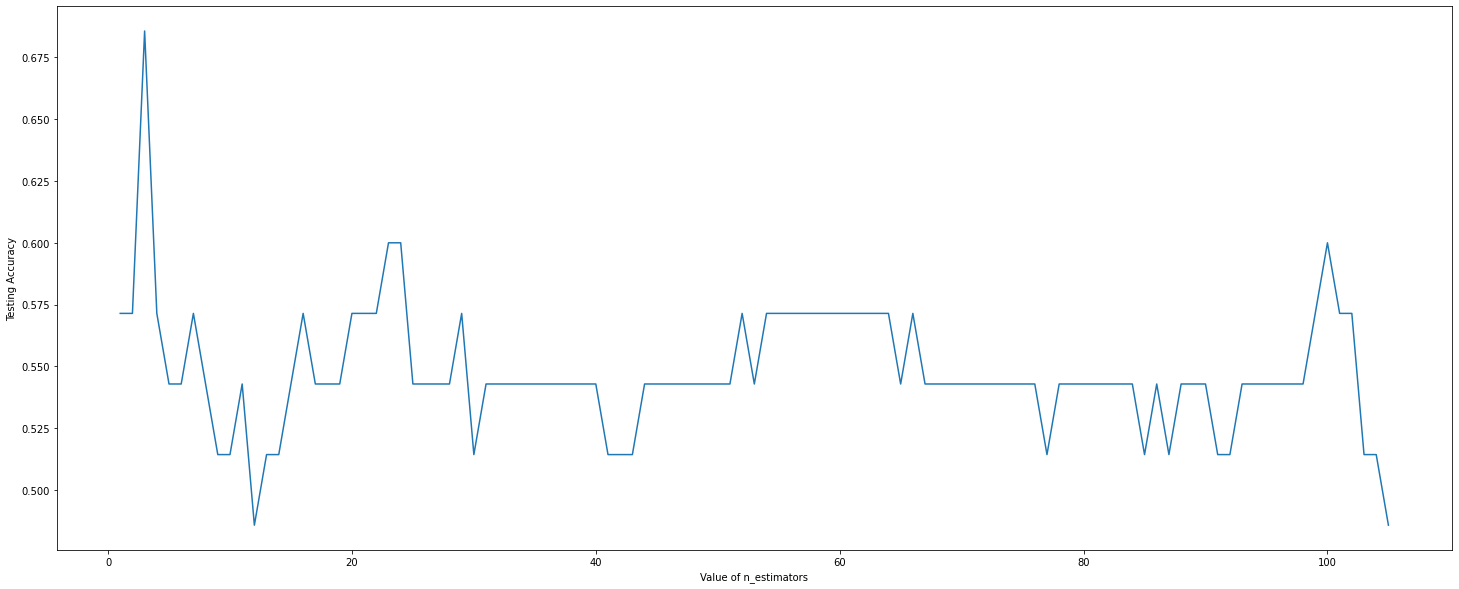

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[15  4]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.69      0.56      0.62        16

    accuracy                           0.69        35
   macro avg       0.69      0.68      0.68        35
weighted avg       0.69      0.69      0.68        35

Accurecy:  0.6857142857142857


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[11  8]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.58      0.69      0.63        16

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.64      0.63      0.63        35

Accurecy:  0.6285714285714286




---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5714285714285714
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=24, random_state=0) 1  :  0.7142857142857143
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.6
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=6, random_state=0) 2  :  0.6285714285714286
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, random_state=0) 2  :  0.6857142857142857
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0) 2  :  0.5428571428571428
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.6571428571428571
---------------------------------------------------------------

RandomForestClassifier(n_esti

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(RandomForestClassifier(n_estimators=12, random_state=0), 3, 'RandomForestClassifier')   :  0.7714285714285715
-------------------------------------------------------------------------------------------------
(XGBClassifier(n_estimators=2), 4, 'xgboost')   :  0.7428571428571429
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(n_estimators=24, random_state=0), 1, 'AdaBoostClassifier')   :  0.7142857142857143
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0), 3, 'RandomForestClassifier')   :  0.7142857142857143
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=1), 4, 'xgboost')   :  0.7142857142857143
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_dep

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(RandomForestClassifier(n_estimators=12, random_state=0), 'RandomForestClassifier')
(XGBClassifier(n_estimators=2), 'xgboost')
(AdaBoostClassifier(n_estimators=24, random_state=0), 'AdaBoostClassifier')
(GradientBoostingClassifier(max_depth=1, random_state=0), 'GradientBoostingClassifier')


In [ ]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
RandomForestClassifier(n_estimators=12, random_state=0)
[[15  4]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.75      0.75      0.75        16

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.77      0.77      0.77        35

Accurecy:  0.7714285714285715
--------------------------------------------------
XGBClassifier(n_estimators=2)
[[16  3]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.77      0.62      0.69        16

    accuracy                           0.74        35
   macro avg       0.75      0.73      0.74        35
weighted avg       0.75      0.74      0.74        35

Accurecy:  0.7428571428571429
--------------------------------------------------
AdaBoostC

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 25.6 MB/s eta 0:00:00


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=20)

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=20)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=20)


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=20)

**Model Check Box Function**

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
new_keys_7=models_check_box(models)

Models:  RandomForestClassifier(n_estimators=12, random_state=0)


Permutation explainer: 131it [00:17,  3.98it/s]


Global Explaination


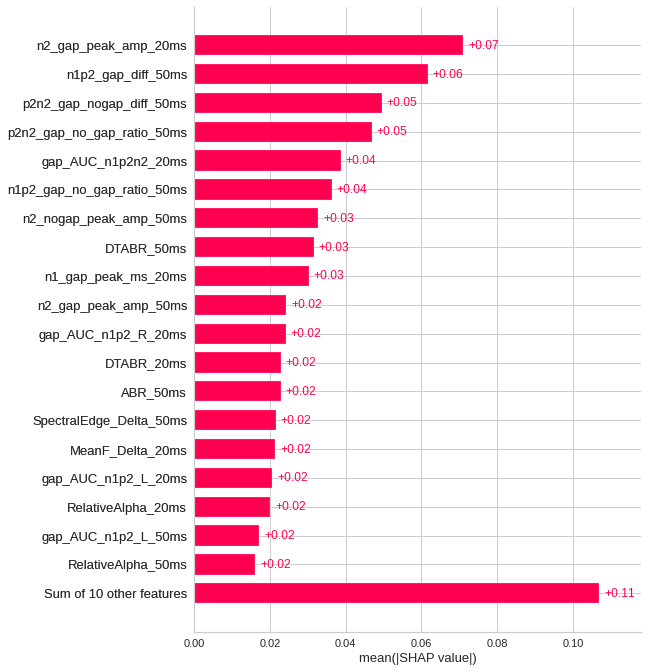

Global Explaination


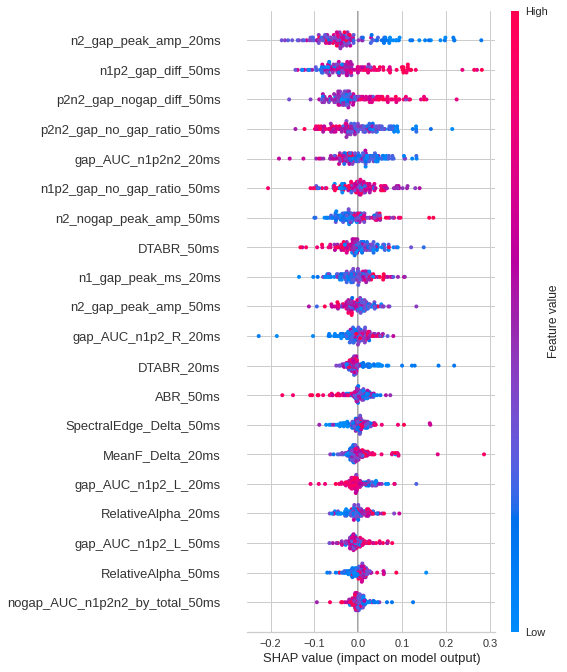

---------------------
Local Explaination


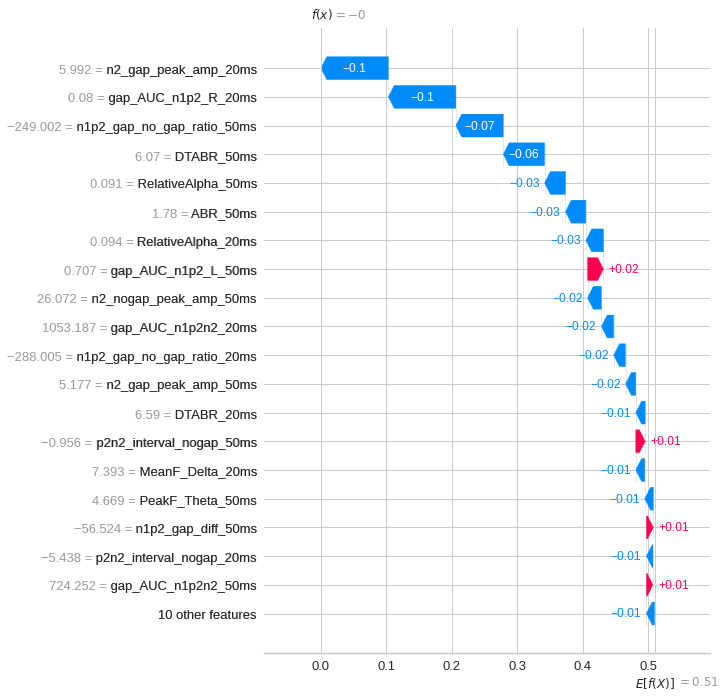

Local Explaination


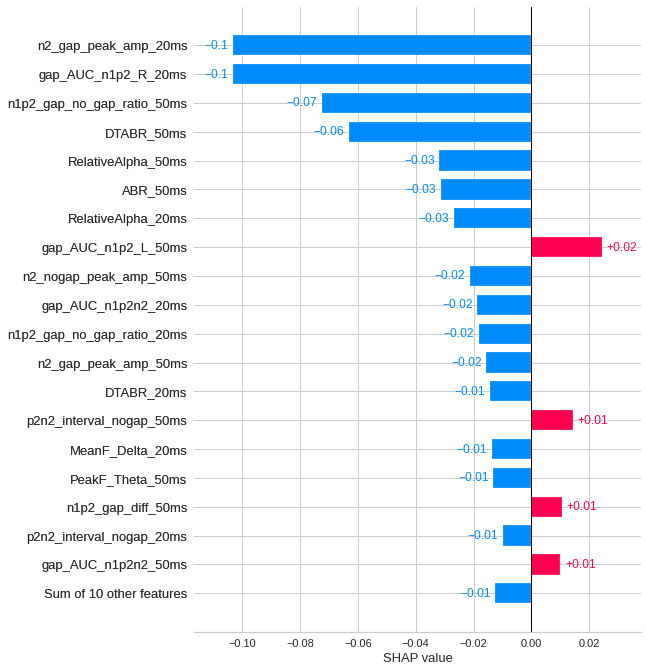

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])

  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])

  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

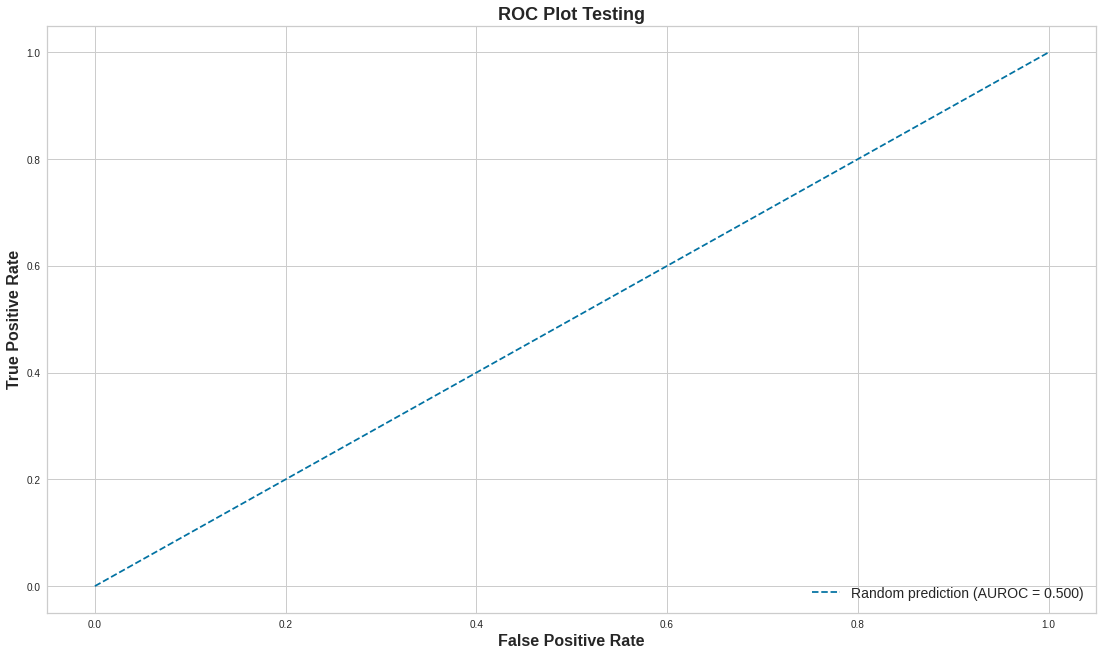

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

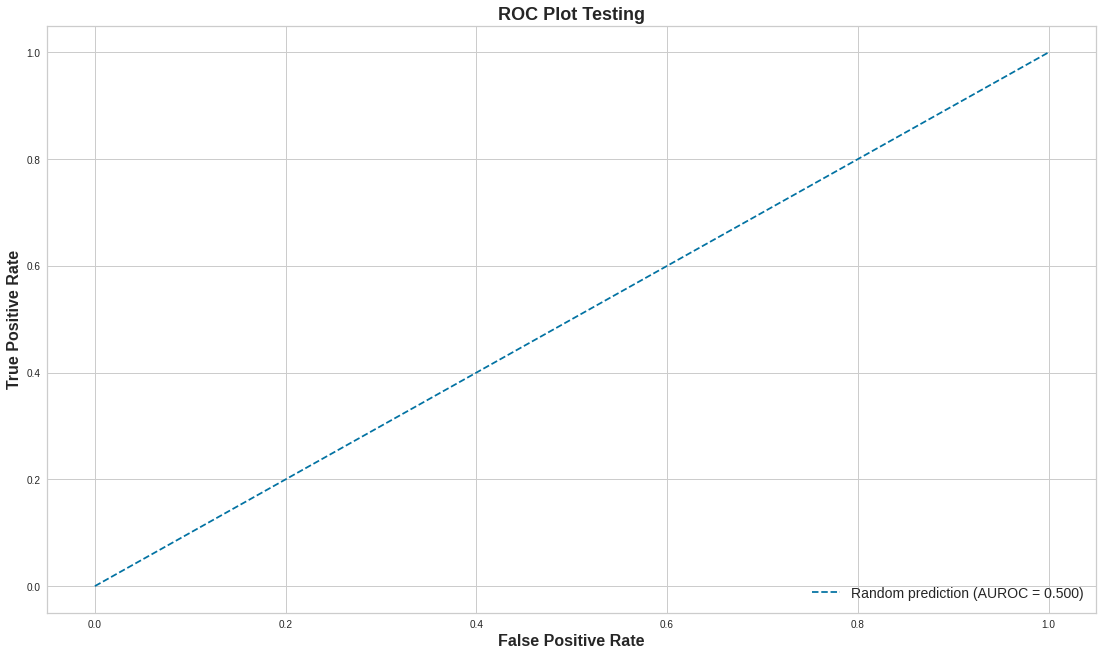

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5714285714285714
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6727272727272727 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=24, random_state=0)  -> Accuracy:  0.7142857142857143
AdaBoostClassifier(n_estimators=24, random_state=0)  -> AVG Accurecy After CV: 0.6606060606060606 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.6
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6666666666666667 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=6, random_state=0)  -> Accuracy:  0.6285714285714286
GradientBoostingClassifier(n_estimators=6, random_state=0)  -> AVG Accurecy After CV: 0.6363636363636364 (For 5 Fold)
----------------------------------------

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend(
           prop = {'size' : graph_feat["legend Font Size"]},
           loc = graph_feat["legend Position"])

  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=24, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=6, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=2)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=2)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(29,), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 11ms/step - loss: 3.8367 - accuracy: 0.2615
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 2.3613 - accuracy: 0.4846
Epoch 3/200
5/5 [==============================] - 0s 6ms/step - loss: 1.7025 - accuracy: 0.4846
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 1.3647 - accuracy: 0.4846
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 1.0757 - accuracy: 0.4846
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.9258 - accuracy: 0.4846
Epoch 7/200
5/5 [==============================] - 0s 11ms/step - loss: 0.8440 - accuracy: 0.4846
Epoch 8/200
5/5 [==============================] - 0s 11ms/step - loss: 0.7925 - accuracy: 0.5000
Epoch 9/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7676 - accuracy: 0.6077
Epoch 10/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7534 - accuracy: 0.5692
Epoch 11/200
5/5 [======

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.5429


[0.6881520748138428, 0.5428571701049805]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

2/2 [==============================] - 0s 8ms/step
[[19  0]
 [16  0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        19
           1       0.00      0.00      0.00        16

    accuracy                           0.54        35
   macro avg       0.27      0.50      0.35        35
weighted avg       0.29      0.54      0.38        35

Accurecy:  0.5428571428571428


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
